=== DURATIONS ===
A=2000.00, L=1700.00, E=300.00
D_A=4.180000, D_L=2.835294, DG=1.770000, D_E=11.800000

=== LINEAR FUNCTIONS (Δy in %) ===
ΔA ≈ -80.886888 * Δy(%) + -0.000000
ΔL ≈ -47.340401 * Δy(%) + -0.000000
ΔE ≈ -33.546487 * Δy(%) + 0.000000



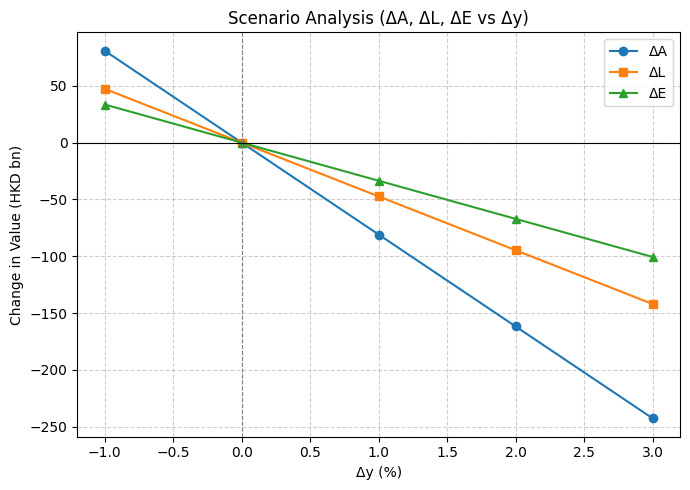

In [1]:
from dataclasses import dataclass
from typing import List, Optional
import matplotlib.pyplot as plt
import numpy as np

@dataclass
class Item:
    name: str
    MV: float
    y: Optional[float]
    D: float

assets: List[Item] = [
    Item("Cash",                 700, None, 0.00),
    Item("Commercial Loan",      300, 0.145, 2.20),
    Item("Mortgage Loan",        500, 0.065, 11.50),
    Item("US Treasury Debts",    300, 0.048, 6.50),
    Item("Building & Equip",     200, None, 0.00),
]

liabs: List[Item] = [
    Item("Savings & Time Deposit", 1400, 0.032, 2.20),
    Item("Certificates of Deposit", 300, 0.044, 5.80),
]

dy_list = [-0.01, 0.0, 0.01, 0.02, 0.03]

def weighted_duration(items: List[Item], total: float) -> float:
    return sum((it.MV / total) * it.D for it in items)

def duration_gap(D_A: float, D_L: float, A: float, L: float) -> float:
    return D_A - (L / A) * D_L

def equity_duration(D_A: float, D_L: float, A: float, L: float, E: float) -> float:
    return (A / E) * (D_A - (L / A) * D_L)

def delta_value(item: Item, dy: float) -> float:
    if item.D == 0 or item.y is None:
        return 0.0
    return - item.D * item.MV * dy / (1.0 + item.y / 2.0)

def scenario(items_A: List[Item], items_L: List[Item], dy_values: List[float]):
    A = sum(it.MV for it in items_A)
    L = sum(it.MV for it in items_L)
    E = A - L

    D_A = weighted_duration(items_A, A)
    D_L = weighted_duration(items_L, L)
    DG  = duration_gap(D_A, D_L, A, L)
    D_E = equity_duration(D_A, D_L, A, L, E)

    print("=== DURATIONS ===")
    print(f"A={A:.2f}, L={L:.2f}, E={E:.2f}")
    print(f"D_A={D_A:.6f}, D_L={D_L:.6f}, DG={DG:.6f}, D_E={D_E:.6f}\n")

    delta_A, delta_L, delta_E = [], [], []
    for dy in dy_values:
        dA = sum(delta_value(it, dy) for it in items_A)
        dL = sum(delta_value(it, dy) for it in items_L)
        dE = dA - dL
        delta_A.append(dA)
        delta_L.append(dL)
        delta_E.append(dE)

    print("=== LINEAR FUNCTIONS (Δy in %) ===")
    coeffs_A = np.polyfit([d*100 for d in dy_values], delta_A, 1)
    coeffs_L = np.polyfit([d*100 for d in dy_values], delta_L, 1)
    coeffs_E = np.polyfit([d*100 for d in dy_values], delta_E, 1)
    print(f"ΔA ≈ {coeffs_A[0]:.6f} * Δy(%) + {coeffs_A[1]:.6f}")
    print(f"ΔL ≈ {coeffs_L[0]:.6f} * Δy(%) + {coeffs_L[1]:.6f}")
    print(f"ΔE ≈ {coeffs_E[0]:.6f} * Δy(%) + {coeffs_E[1]:.6f}\n")

    plt.figure(figsize=(7,5))
    plt.plot([d*100 for d in dy_values], delta_A, "o-", label="ΔA")
    plt.plot([d*100 for d in dy_values], delta_L, "s-", label="ΔL")
    plt.plot([d*100 for d in dy_values], delta_E, "^-", label="ΔE")
    plt.axhline(0, color="black", linewidth=0.8)
    plt.axvline(0, color="gray", linestyle="--", linewidth=0.8)
    plt.xlabel("Δy (%)")
    plt.ylabel("Change in Value (HKD bn)")
    plt.title("Scenario Analysis (ΔA, ΔL, ΔE vs Δy)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.savefig("scenario_analysis.png", dpi=300)
    plt.show()

scenario(assets, liabs, dy_list)

